In [1]:
from __future__ import division, print_function
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from scipy.misc import imresize
import itertools
import matplotlib.pyplot as plt
import numpy as np
import random
import os
%matplotlib inline

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
os.getcwd()

'/home/ubuntu/siamese'

In [3]:
DATA_DIR = ""
IMAGE_DIR = os.path.join(DATA_DIR, "images")

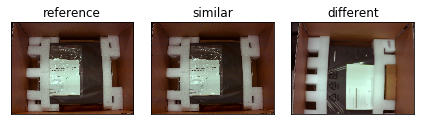

In [4]:
ref_image = plt.imread(os.path.join(IMAGE_DIR, "060001.jpg"))
sim_image = plt.imread(os.path.join(IMAGE_DIR, "060002.jpg"))
dif_image = plt.imread(os.path.join(IMAGE_DIR, "080001.jpg"))

def draw_image(subplot, image, title):
    plt.subplot(subplot)
    plt.imshow(image)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    
draw_image(131, ref_image, "reference")
draw_image(132, sim_image, "similar")
draw_image(133, dif_image, "different")
plt.tight_layout()
plt.show()

In [ ]:
image_groups = {}
for image_name in os.listdir(IMAGE_DIR):
    base_name = image_name[2:-4]
    group_name = base_name[0:2]
    print(base_name)
    if group_name in image_groups:
        image_groups[group_name].append(image_name)
    else:
        image_groups[group_name] = [image_name]

num_sim = 0
image_triples = []
group_list = sorted(list(image_groups.keys()))
for i, g in enumerate(group_list):
    if num_sim % 100 == 0:
        print("Generated {:d} pos + {:d} neg = {:d} total image triples"
              .format(num_sim, num_sim, 2*num_sim), end="\r")
    images_in_group = image_groups[g]
    # generate similar pairs
    sim_pairs_it = itertools.combinations(images_in_group, 2)
    # for each similar pair, generate a different pair
    for ref_image, sim_image in sim_pairs_it:
        image_triples.append((ref_image, sim_image, 1))
        num_sim += 1
        while True:
            j = np.random.randint(low=0, high=len(group_list), size=1)[0]
            if j != i: break
        dif_image_candidates = image_groups[group_list[j]]
        k = np.random.randint(low=0, high=len(dif_image_candidates), size=1)[0]
        dif_image = dif_image_candidates[k]
        image_triples.append((ref_image, dif_image, 0))
print("Generated {:d} pos + {:d} neg = {:d} total image triples, COMPLETE"
      .format(num_sim, num_sim, 2*num_sim))        

0001
0003
0006
0006
0005
0005
0001
0009
0003
0001
0004
0005
0007
0007
0008
0009
0002
0006
0006
0005
0003
0006
0001
0001
0002
0003
0006
0003
0009
0001
0005
0003
0006
0006
0004
0006
0004
0009
0002
0001
0009
0007
0009
0005
0005
0007
0001
0004
0002
0008
0007
0009
0004
0006
0008
0001
0007
0004
0005
0004
0006
0001
0007
0009
0002
0001
0002
0009
0002
0003
0008
0002
0003
0004
0003
0004
0004
0004
0007
0009
0003
0005
0007
0009
0003
0004
0002
0001
0008
0008
0006
0007
0006
0003
0002
0006
0007
0001
0007
0004
0003
0005
0007
0005
0002
0002
0009
0005
0004
0009
0004
0003
0002
0004
0005
0008
0006
0007
0008
0001
0004
0003
0009
0006
0006
0006
0001
0005
0008
0008
0005
0003
0001
0001
0007
0008
0004
0007
0004
0005
0002
0007
0008
0005
0006
0006
0003
0003
0005
0008
0005
0008
0007
0003
0005
0008
0008
0008
0008
0006
0003
0006
0008
0002
0007
0006
0001
0009
0005
0007
0003
0003
0004
0003
0004
0005
0007
0007
0009
0007
0007
0002
0008
0002
0006
0002
0006
0002
0007
0003
0002
0004
0002
0008
0007
0007
0008
0002
0004
0003


In [8]:
group_list

['01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46']

In [25]:
def image_triple_generator(image_triples, batch_size):
    while True:
        # loop once per epoch
        num_recs = len(image_triples)
        indices = np.random.permutation(np.arange(num_recs))
        num_batches = num_recs // batch_size
        for bid in range(num_batches):
            # loop once per batch
            batch_indices = indices[bid * batch_size : (bid + 1) * batch_size]
            yield [image_triples[i] for i in batch_indices]
            
triples_batch_gen = image_triple_generator(image_triples, 4)
triples_batch_gen.__next__()

[('390009.jpg', '220005.jpg', 0),
 ('250002.jpg', '430005.jpg', 0),
 ('280005.jpg', '280004.jpg', 1),
 ('340009.jpg', '340005.jpg', 1)]

In [26]:
triples_batch_gen.__next__()

[('350003.jpg', '350007.jpg', 1),
 ('320006.jpg', '320009.jpg', 1),
 ('200008.jpg', '240005.jpg', 0),
 ('060004.jpg', '060008.jpg', 1)]

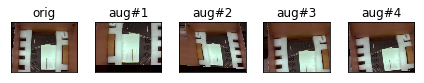

In [38]:
datagen_args = dict(rotation_range=10,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)
datagen = ImageDataGenerator(**datagen_args)

sid = 150
np.random.seed(42)
image = plt.imread(os.path.join(IMAGE_DIR, "080001.jpg"))
sid += 1
draw_image(sid, image, "orig")
for j in range(4):
    augmented = datagen.random_transform(image)
    sid += 1
    draw_image(sid, augmented, "aug#{:d}".format(j + 1))

plt.tight_layout()
plt.show()

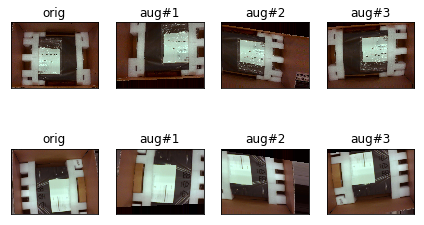

In [37]:
image_pair = ["060003.jpg", "080003.jpg"]

datagens = [ImageDataGenerator(**datagen_args),
            ImageDataGenerator(**datagen_args)]

sid = 240
for i, image in enumerate(image_pair):
    image = plt.imread(os.path.join(IMAGE_DIR, image_pair[i]))
    sid += 1
    draw_image(sid, image, "orig")
    # make sure the two image data generators generate same transformations
    np.random.seed(42)
    for j in range(3):
        augmented = datagens[i].random_transform(image)
        sid += 1
        draw_image(sid, augmented, "aug#{:d}".format(j + 1))

plt.tight_layout()
plt.show()

In [35]:
RESIZE_WIDTH = 300
RESIZE_HEIGHT = 300

def cached_imread(image_path, image_cache):
    if image_path not in image_cache:
        image = plt.imread(image_path)
        image = imresize(image, (RESIZE_WIDTH, RESIZE_HEIGHT))
        image_cache[image_path] = image
    return image_cache[image_path]

def preprocess_images(image_names, seed, datagen, image_cache):
    np.random.seed(seed)
    X = np.zeros((len(image_names), RESIZE_WIDTH, RESIZE_HEIGHT, 3))
    for i, image_name in enumerate(image_names):
        image = cached_imread(os.path.join(IMAGE_DIR, image_name), image_cache)
        X[i] = datagen.random_transform(image)
    return X

def image_triple_generator(image_triples, batch_size):
    datagen_args = dict(rotation_range=10,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        shear_range=0.2,
                        zoom_range=0.2,
                        horizontal_flip=True)
    datagen_left = ImageDataGenerator(**datagen_args)
    datagen_right = ImageDataGenerator(**datagen_args)
    image_cache = {}
    
    while True:
        # loop once per epoch
        num_recs = len(image_triples)
        indices = np.random.permutation(np.arange(num_recs))
        num_batches = num_recs // batch_size
        for bid in range(num_batches):
            # loop once per batch
            batch_indices = indices[bid * batch_size : (bid + 1) * batch_size]
            batch = [image_triples[i] for i in batch_indices]
            # make sure the two image data generators generate same transformations
            seed = np.random.randint(low=0, high=1000, size=1)[0]
            Xleft = preprocess_images([b[0] for b in batch], seed, datagen_left, image_cache)
            Xright = preprocess_images([b[1] for b in batch], seed, datagen_right, image_cache)
            Y = np_utils.to_categorical(np.array([b[2] for b in batch]))
            yield Xleft, Xright, Y

In [36]:
triples_batch_gen = image_triple_generator(image_triples, 32)
Xleft, Xright, Y = triples_batch_gen.__next__()
print(Xleft.shape, Xright.shape, Y.shape)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


(32, 300, 300, 3) (32, 300, 300, 3) (32, 2)


### Imageinhance
##### -*- coding:utf-8 -*-
数据增强
   1. 翻转变换 flip
   2. 随机修剪 random crop
   3. 色彩抖动 color jittering
   4. 平移变换 shift
   5. 尺度变换 scale
   6. 对比度变换 contrast
   7. 噪声扰动 noise
   8. 旋转变换/反射变换 Rotation/reflection
   author: XiJun.Gong
   date:2016-11-29


In [1]:
from PIL import Image, ImageEnhance, ImageOps, ImageFile
import numpy as np
import random
import threading, os, time
import logging

logger = logging.getLogger(__name__)
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
class DataAugmentation:
    """
    包含数据增强的八种方式
    """


    def __init__(self):
        pass

    @staticmethod
    def openImage(image):
        return Image.open(image, mode="r")

    @staticmethod
    def randomRotation(image, mode=Image.BICUBIC):
        """
         对图像进行随机任意角度(0~360度)旋转
        :param mode 邻近插值,双线性插值,双三次B样条插值(default)
        :param image PIL的图像image
        :return: 旋转转之后的图像
        """
        random_angle = np.random.randint(1, 360)
        return image.rotate(random_angle, mode)

    @staticmethod
    def randomCrop(image):
        """
        对图像随意剪切,考虑到图像大小范围(68,68),使用一个一个大于(36*36)的窗口进行截图
        :param image: PIL的图像image
        :return: 剪切之后的图像

        """
        image_width = image.size[0]
        image_height = image.size[1]
        crop_win_size = np.random.randint(40, 68)
        random_region = (
            (image_width - crop_win_size) >> 1, (image_height - crop_win_size) >> 1, (image_width + crop_win_size) >> 1,
            (image_height + crop_win_size) >> 1)
        return image.crop(random_region)

    @staticmethod
    def randomColor(image):
        """
        对图像进行颜色抖动
        :param image: PIL的图像image
        :return: 有颜色色差的图像image
        """
        random_factor = np.random.randint(0, 31) / 10.  # 随机因子
        color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
        random_factor = np.random.randint(10, 21) / 10.  # 随机因子
        brightness_image = ImageEnhance.Brightness(color_image).enhance(random_factor)  # 调整图像的亮度
        random_factor = np.random.randint(10, 21) / 10.  # 随机因1子
        contrast_image = ImageEnhance.Contrast(brightness_image).enhance(random_factor)  # 调整图像对比度
        random_factor = np.random.randint(0, 31) / 10.  # 随机因子
        return ImageEnhance.Sharpness(contrast_image).enhance(random_factor)  # 调整图像锐度

    @staticmethod
    def randomGaussian(image, mean=0.2, sigma=0.3):
        """
         对图像进行高斯噪声处理
        :param image:
        :return:
        """

        def gaussianNoisy(im, mean=0.2, sigma=0.3):
            """
            对图像做高斯噪音处理
            :param im: 单通道图像
            :param mean: 偏移量
            :param sigma: 标准差
            :return:
            """
            for _i in range(len(im)):
                im[_i] += random.gauss(mean, sigma)
            return im

        # 将图像转化成数组
        img = np.asarray(image)
        img.flags.writeable = True  # 将数组改为读写模式
        width, height = img.shape[:2]
        img_r = gaussianNoisy(img[:, :, 0].flatten(), mean, sigma)
        img_g = gaussianNoisy(img[:, :, 1].flatten(), mean, sigma)
        img_b = gaussianNoisy(img[:, :, 2].flatten(), mean, sigma)
        img[:, :, 0] = img_r.reshape([width, height])
        img[:, :, 1] = img_g.reshape([width, height])
        img[:, :, 2] = img_b.reshape([width, height])
        return Image.fromarray(np.uint8(img))

    @staticmethod
    def saveImage(image, path):
        image.save(path)

In [5]:
def makeDir(path):
    try:
        if not os.path.exists(path):
            if not os.path.isfile(path):
                # os.mkdir(path)
                os.makedirs(path)
            return 0
        else:
            return 1
    except Exception:
        print(str(e))
        return -2


def imageOps(func_name, image, des_path, file_name, times=5):
    funcMap = {"randomRotation": DataAugmentation.randomRotation,
               "randomCrop": DataAugmentation.randomCrop,
               "randomColor": DataAugmentation.randomColor,
               "randomGaussian": DataAugmentation.randomGaussian
               }
    if funcMap.get(func_name) is None:
        logger.error("%s is not exist", func_name)
        return -1

    for _i in range(0, times, 1):
        new_image = funcMap[func_name](image)
        DataAugmentation.saveImage(new_image, os.path.join(des_path, func_name + str(_i) + file_name))


opsList = {"randomRotation", "randomCrop", "randomColor", "randomGaussian"}


In [10]:
def threadOPS(path, new_path):
    """
    多线程处理事务
    :param src_path: 资源文件
    :param des_path: 目的地文件
    :return:
    """
    if os.path.isdir(path):
        img_names = os.listdir(path)
    else:
        img_names = [path]
    for img_name in img_names:
        print(img_name)
        tmp_img_name = os.path.join(path, img_name)
        if os.path.isdir(tmp_img_name):
            if makeDir(os.path.join(new_path, img_name)) != -1:
                threadOPS(tmp_img_name, os.path.join(new_path, img_name))
            else:
                print('create new dir failure')
                return -1
                # os.removedirs(tmp_img_name)
        elif tmp_img_name.split('.')[0] != "DS_Store":
            # 读取文件并进行操作
            image = DataAugmentation.openImage(tmp_img_name)
            threadImage = [0] * 5
            _index = 0
            for ops_name in opsList:
                threadImage[_index] = threading.Thread(target=imageOps,
                                                       args=(ops_name, image, new_path, img_name,))
                threadImage[_index].start()
                _index += 1
                time.sleep(0.2)

In [12]:
if __name__ == '__main__':
    threadOPS("/home/ubuntu/siamese/images",
              "/home/ubuntu/siamese/images_train")

030001.jpg
350003.jpg
380006.jpg
030006.jpg
170005.jpg
220005.jpg


Exception in thread Thread-25:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    

370001.jpg
080009.jpg
100003.jpg
210001.jpg


Exception in thread Thread-41:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    

370004.jpg
410005.jpg
070007.jpg
280007.jpg


Exception in thread Thread-57:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    

410008.jpg
330009.jpg
310002.jpg
430006.jpg


Exception in thread Thread-70:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
ValueError: I/O operation on closed file



200006.jpg
140005.jpg


Exception in thread Thread-81:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
    

030003.jpg


Exception in thread Thread-86:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
ValueError: I/O operation on closed file



350006.jpg
080001.jpg


Exception in thread Thread-90:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
AttributeError: 'NoneType' object has no attribute 'read

260001.jpg
140002.jpg


Exception in thread Thread-100:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

210003.jpg


Exception in thread Thread-105:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
   

100006.jpg
050003.jpg


Exception in thread Thread-112:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

050009.jpg
340001.jpg


Exception in thread Thread-120:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

260005.jpg
230003.jpg


Exception in thread Thread-130:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
    self.fp.close()
AttributeError: 'NoneType' object has no attribute 'close'

Exception in thread Thread-131:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap

320006.jpg


Exception in thread Thread-132:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

260006.jpg


Exception in thread Thread-137:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
   

060004.jpg
290006.jpg
430004.jpg


Exception in thread Thread-149:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

170009.jpg
030002.jpg
130001.jpg


Exception in thread Thread-161:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
   

200009.jpg
160007.jpg


Exception in thread Thread-170:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
AttributeError: 'NoneType' object has no attribute 'rea

120009.jpg
430005.jpg


Exception in thread Thread-179:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 80, in randomGaussian
    width, height = img.shape[:2]
ValueError: not enough values to unpack (expected 2, got 0)

Exception in thread Thread-178:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_

390005.jpg


Exception in thread Thread-181:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

110007.jpg
420001.jpg


Exception in thread Thread-186:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
    self.fp.close()
AttributeError: 'NoneType' object has no attribute 'close'

Exception in thread Thread-190:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap

070004.jpg
330002.jpg


Exception in thread Thread-193:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

450008.jpg


Exception in thread Thread-197:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
   

230007.jpg


Exception in thread Thread-204:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

390009.jpg
080004.jpg


Exception in thread Thread-213:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

410006.jpg


Exception in thread Thread-216:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

050008.jpg
270001.jpg


Exception in thread Thread-223:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 80, in randomGaussian
    width, height = img.shape[:2]
ValueError: not enough values to unpack (expected 2, got 0)

Exception in thread Thread-222:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_

190007.jpg


Exception in thread Thread-226:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
    self.fp.close()
AttributeError: 'NoneType' object has no attribute 'close'

Exception in thread Thread-227:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap

170004.jpg
190005.jpg


Exception in thread Thread-237:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

310004.jpg


Exception in thread Thread-242:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
AttributeError: 'NoneType' object has no attribute 'rea

060006.jpg


Exception in thread Thread-240:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

450001.jpg
350007.jpg


Exception in thread Thread-250:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
ValueError: read of closed file

Exception in thread Th

190009.jpg
020002.jpg
360001.jpg
250002.jpg
020009.jpg


Exception in thread Thread-270:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
    self.fp.close()
AttributeError: 'NoneType' object has no attribute 'close'

Exception in thread Thread-269:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap

320002.jpg
130003.jpg


Exception in thread Thread-281:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

130008.jpg
160002.jpg
390003.jpg
290004.jpg
040003.jpg


Exception in thread Thread-297:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
   

330004.jpg


Exception in thread Thread-301:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
   

460004.jpg
150004.jpg
450007.jpg
400009.jpg
460003.jpg


Exception in thread Thread-325:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

380005.jpg
260007.jpg
360009.jpg


Exception in thread Thread-336:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

190003.jpg


Exception in thread Thread-341:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
   

450004.jpg
060002.jpg


Exception in thread Thread-350:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
ValueError: I/O operation on closed file



060001.jpg


Exception in thread Thread-353:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

390008.jpg
250008.jpg
280006.jpg


Exception in thread Thread-362:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
ValueError: I/O operation on closed file

Exception in 

170007.jpg


Exception in thread Thread-369:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

270006.jpg


Exception in thread Thread-373:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

120003.jpg


Exception in thread Thread-374:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
AttributeError: 'NoneType' object has no attribute 'rea

080002.jpg
180006.jpg


Exception in thread Thread-381:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
   

250007.jpg


Exception in thread Thread-388:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

230001.jpg
080007.jpg
110004.jpg
170003.jpg


Exception in thread Thread-405:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

090005.jpg
240007.jpg
350005.jpg


Exception in thread Thread-414:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
ValueError: I/O operation on closed file



070002.jpg


Exception in thread Thread-419:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 80, in randomGaussian
    width, height = img.shape[:2]
ValueError: not enough values to unpack (expected 2, got 0)



450002.jpg
220009.jpg


Exception in thread Thread-425:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

440005.jpg


Exception in thread Thread-432:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

350004.jpg


Exception in thread Thread-437:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

250009.jpg
250004.jpg
410003.jpg


Exception in thread Thread-446:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
ValueError: I/O operation on closed file



370002.jpg


Exception in thread Thread-448:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

040004.jpg


Exception in thread Thread-458:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
ValueError: I/O operation on closed file



300005.jpg
380008.jpg
140006.jpg


Exception in thread Thread-466:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
ValueError: I/O operation on closed file



290007.jpg
180008.jpg
300001.jpg


Exception in thread Thread-481:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

390004.jpg


Exception in thread Thread-485:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
   

280003.jpg
340009.jpg


Exception in thread Thread-492:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

220006.jpg


Exception in thread Thread-496:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

090006.jpg
010006.jpg
440001.jpg


Exception in thread Thread-506:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
ValueError: I/O operation on closed file

Exception in 

360005.jpg
420008.jpg


Exception in thread Thread-517:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

350008.jpg
060005.jpg
320003.jpg


Exception in thread Thread-528:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

140001.jpg
400001.jpg


Exception in thread Thread-537:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

430007.jpg


Exception in thread Thread-534:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
ValueError: I/O operation on closed file



040008.jpg
180004.jpg


Exception in thread Thread-546:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
ValueError: I/O operation on closed file



030007.jpg
190004.jpg
070005.jpg
360002.jpg


Exception in thread Thread-558:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
    self.fp.close()
AttributeError: 'NoneType' object has no attribute 'close'

Exception in thread Thread-559:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap

340007.jpg


Exception in thread Thread-564:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

020008.jpg


Exception in thread Thread-573:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

020005.jpg
040006.jpg
440006.jpg


Exception in thread Thread-585:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
   

420003.jpg
450003.jpg
370005.jpg
440008.jpg


Exception in thread Thread-602:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
AttributeError: 'NoneType' object has no attribute 'rea

180005.jpg


Exception in thread Thread-601:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
   

280008.jpg
120007.jpg
370003.jpg


Exception in thread Thread-617:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

320005.jpg
160008.jpg


Exception in thread Thread-623:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 80, in randomGaussian
    width, height = img.shape[:2]
ValueError: not enough values to unpack (expected 2, got 0)

Exception in thread Thread-622:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_

230008.jpg

Exception in thread Thread-621:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
   


310008.jpg


Exception in thread Thread-627:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 80, in randomGaussian
    width, height = img.shape[:2]
ValueError: not enough values to unpack (expected 2, got 0)

Exception in thread Thread-626:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_

200008.jpg
340006.jpg


Exception in thread Thread-641:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

300003.jpg
230006.jpg


Exception in thread Thread-648:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

340008.jpg
460002.jpg

Exception in thread Thread-655:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 80, in randomGaussian
    width, height = img.shape[:2]
ValueError: not enough values to unpack (expected 2, got 0)

Exception in thread Thread-652:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_

Exception in thread Thread-656:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

130007.jpg


Exception in thread Thread-660:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

420006.jpg
150001.jpg


Exception in thread Thread-669:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

460009.jpg
040005.jpg


Exception in thread Thread-674:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
ValueError: I/O operation on closed file

Exception in 

360007.jpg


Exception in thread Thread-680:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

310003.jpg


Exception in thread Thread-685:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

330003.jpg
140004.jpg


Exception in thread Thread-693:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
   

080003.jpg


Exception in thread Thread-697:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
   

090004.jpg


Exception in thread Thread-701:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
   

120005.jpg


Exception in thread Thread-705:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
   

020007.jpg
460007.jpg


Exception in thread Thread-709:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

090009.jpg


Exception in thread Thread-715:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 80, in randomGaussian
    width, height = img.shape[:2]
ValueError: not enough values to unpack (expected 2, got 0)

Exception in thread Thread-713:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_

330007.jpg
180007.jpg


Exception in thread Thread-725:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
   

300002.jpg


Exception in thread Thread-729:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

330008.jpg
110002.jpg


Exception in thread Thread-736:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

400006.jpg


Exception in thread Thread-735:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 80, in randomGaussian
    width, height = img.shape[:2]
ValueError: not enough values to unpack (expected 2, got 0)
Exception in thread Thread-733:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_n

150002.jpg
130006.jpg


Exception in thread Thread-748:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

260002.jpg
410007.jpg
400003.jpg
100002.jpg


Exception in thread Thread-764:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

230004.jpg


Exception in thread Thread-769:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

120002.jpg


Exception in thread Thread-773:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
   

110008.jpg
270007.jpg
420007.jpg
190008.jpg


Exception in thread Thread-784:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

170002.jpg


Exception in thread Thread-788:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

270004.jpg


Exception in thread Thread-795:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 80, in randomGaussian
    width, height = img.shape[:2]
ValueError: not enough values to unpack (expected 2, got 0)

Exception in thread Thread-794:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_

020003.jpg
090003.jpg


Exception in thread Thread-805:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

450005.jpg
350002.jpg


Exception in thread Thread-811:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 80, in randomGaussian
    width, height = img.shape[:2]
ValueError: not enough values to unpack (expected 2, got 0)



050002.jpg
300006.jpg


Exception in thread Thread-817:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
   

110009.jpg


Exception in thread Thread-822:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
ValueError: I/O operation on closed file

Exception in 

080006.jpg
060007.jpg


Exception in thread Thread-833:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

150009.jpg


Exception in thread Thread-837:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

210007.jpg
220008.jpg
390006.jpg


Exception in thread Thread-847:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 80, in randomGaussian
    width, height = img.shape[:2]
ValueError: not enough values to unpack (expected 2, got 0)



210008.jpg
040007.jpg


Exception in thread Thread-858:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
ValueError: I/O operation on closed file



090007.jpg


Exception in thread Thread-860:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

170006.jpg
210004.jpg
130002.jpg


Exception in thread Thread-861:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

070003.jpg
150007.jpg

Exception in thread Thread-879:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 80, in randomGaussian
    width, height = img.shape[:2]
ValueError: not enough values to unpack (expected 2, got 0)




370009.jpg
010003.jpg
030009.jpg
180002.jpg
410001.jpg


Exception in thread Thread-901:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

160004.jpg


Exception in thread Thread-905:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

400004.jpg
230005.jpg


Exception in thread Thread-911:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 80, in randomGaussian
    width, height = img.shape[:2]
ValueError: not enough values to unpack (expected 2, got 0)

Exception in thread Thread-910:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_

270003.jpg
050001.jpg


Exception in thread Thread-921:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
   

280002.jpg


Exception in thread Thread-925:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

010004.jpg


Exception in thread Thread-929:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

110005.jpg


Exception in thread Thread-933:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

340002.jpg


Exception in thread Thread-936:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

220007.jpg


Exception in thread Thread-942:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
AttributeError: 'NoneType' object has no attribute 'rea

050005.jpg


Exception in thread Thread-944:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

260008.jpg
210009.jpg
240009.jpg


Exception in thread Thread-945:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

250003.jpg
150006.jpg


Exception in thread Thread-964:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

160005.jpg
090002.jpg
060009.jpg


Exception in thread Thread-974:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
ValueError: I/O operation on closed file
Exception in t

380002.jpg


Exception in thread Thread-980:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubunt

080005.jpg


Exception in thread Thread-985:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

240006.jpg


Exception in thread Thread-989:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
   

250005.jpg


Exception in thread Thread-994:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
    self.fp.close()
AttributeError: 'NoneType' object has no attribute 'close'



260003.jpg
020001.jpg


Exception in thread Thread-1000:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubun

110003.jpg
210006.jpg


Exception in thread Thread-1009:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
  

290005.jpg
360006.jpg


Exception in thread Thread-1017:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

290003.jpg


Exception in thread Thread-1020:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubun

300009.jpg
320001.jpg


Exception in thread Thread-1029:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

160001.jpg
160009.jpg
160003.jpg
420005.jpg


Exception in thread Thread-1045:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

010007.jpg


Exception in thread Thread-1046:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
AttributeError: 'NoneType' object has no attribute 're

290001.jpg
430008.jpg


Exception in thread Thread-1054:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
ValueError: I/O operation on closed file

Exception in

200007.jpg
200005.jpg
090001.jpg
240002.jpg


Exception in thread Thread-1073:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 206, in load
  

170001.jpg
300008.jpg


Exception in thread Thread-1082:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
AttributeError: 'NoneType' object has no attribute 're

410009.jpg
030008.jpg
260004.jpg


Exception in thread Thread-1091:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 80, in randomGaussian
    width, height = img.shape[:2]
ValueError: not enough values to unpack (expected 2, got 0)

Exception in thread Thread-1089:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[fun

100009.jpg



Exception in thread Thread-1095:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 80, in randomGaussian
    width, height = img.shape[:2]
ValueError: not enough values to unpack (expected 2, got 0)

Exception in thread Thread-1093:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[fu

280009.jpg
420009.jpg


Exception in thread Thread-1100:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubun

440002.jpg


Exception in thread Thread-1109:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

250001.jpg


Exception in thread Thread-1113:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

380004.jpg
360003.jpg
050004.jpg
250006.jpg


Exception in thread Thread-1127:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 80, in randomGaussian
    width, height = img.shape[:2]
ValueError: not enough values to unpack (expected 2, got 0)

Exception in thread Thread-1124:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[fun

110006.jpg
340003.jpg


Exception in thread Thread-1134:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
AttributeError: 'NoneType' object has no attribute 're

290009.jpg


Exception in thread Thread-1141:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

120004.jpg


Exception in thread Thread-1145:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
  

310005.jpg


Exception in thread Thread-1146:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
AttributeError: 'NoneType' object has no attribute 're

290008.jpg
200002.jpg
140008.jpg
220002.jpg
180003.jpg


Exception in thread Thread-1165:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

420002.jpg


Exception in thread Thread-1174:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
ValueError: I/O operation on closed file

Exception in

400008.jpg


Exception in thread Thread-1173:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

310006.jpg


Exception in thread Thread-1181:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
  

410002.jpg
130009.jpg


Exception in thread Thread-1185:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

200003.jpg


Exception in thread Thread-1193:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

310009.jpg
370007.jpg
390001.jpg


Exception in thread Thread-1204:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubun

280005.jpg
240004.jpg
100004.jpg


Exception in thread Thread-1216:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubun

240005.jpg
430001.jpg
010001.jpg


Exception in thread Thread-1229:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
  

010005.jpg
270002.jpg


Exception in thread Thread-1237:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

440004.jpg
190002.jpg
050007.jpg
140007.jpg


Exception in thread Thread-1253:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

100001.jpg
210002.jpg
450006.jpg


Exception in thread Thread-1265:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
  

270008.jpg
220001.jpg

Exception in thread Thread-1269:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  


320008.jpg


Exception in thread Thread-1278:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
AttributeError: 'NoneType' object has no attribute 're

360004.jpg


Exception in thread Thread-1277:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

380003.jpg
180001.jpg


Exception in thread Thread-1287:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 80, in randomGaussian
    width, height = img.shape[:2]
ValueError: not enough values to unpack (expected 2, got 0)

Exception in thread Thread-1285:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[fun

170008.jpg
100007.jpg
280001.jpg


Exception in thread Thread-1298:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
ValueError: I/O operation on closed file



200001.jpg


Exception in thread Thread-1305:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

040009.jpg


Exception in thread Thread-1309:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
  

460006.jpg


Exception in thread Thread-1313:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

060003.jpg
440009.jpg


Exception in thread Thread-1317:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

140003.jpg


Exception in thread Thread-1324:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubun

320004.jpg
380001.jpg


Exception in thread Thread-1333:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
  

450009.jpg
460001.jpg


Exception in thread Thread-1339:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 80, in randomGaussian
    width, height = img.shape[:2]
ValueError: not enough values to unpack (expected 2, got 0)
Exception in thread Thread-1336:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func

410004.jpg
390007.jpg


Exception in thread Thread-1345:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

100008.jpg


Exception in thread Thread-1347:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 80, in randomGaussian
    width, height = img.shape[:2]
ValueError: not enough values to unpack (expected 2, got 0)

Exception in thread Thread-1349:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[fun

380007.jpg
320009.jpg
300004.jpg


Exception in thread Thread-1365:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

110001.jpg
050006.jpg
310007.jpg

Exception in thread Thread-1373:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
  


070006.jpg


Exception in thread Thread-1377:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
  

430003.jpg
150003.jpg
070008.jpg


Exception in thread Thread-1386:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
    self.fp.close()
AttributeError: 'NoneType' object has no attribute 'close'

Exception in thread Thread-1392:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstr

360008.jpg
150008.jpg


Exception in thread Thread-1398:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
ValueError: I/O operation on closed file

Exception in

130004.jpg
370006.jpg


Exception in thread Thread-1406:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
AttributeError: 'NoneType' object has no attribute 're

150005.jpg


Exception in thread Thread-1404:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubun

330005.jpg
390002.jpg

Exception in thread Thread-1417:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  


270005.jpg


Exception in thread Thread-1424:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubun

440003.jpg


Exception in thread Thread-1429:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

420004.jpg


Exception in thread Thread-1432:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubun

030005.jpg


Exception in thread Thread-1437:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

020004.jpg


Exception in thread Thread-1441:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
  

160006.jpg


Exception in thread Thread-1444:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubun

400002.jpg
090008.jpg
210005.jpg


Exception in thread Thread-1453:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

120006.jpg


Exception in thread Thread-1461:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

180009.jpg
270009.jpg
040001.jpg


Exception in thread Thread-1470:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 206, in load
    seek(offset)
ValueError: I/O operation on closed file

Exception in thread Thread-1471:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run

310001.jpg


Exception in thread Thread-1474:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
AttributeError: 'NoneType' object has no attribute 're

400007.jpg


Exception in thread Thread-1481:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

240008.jpg


Exception in thread Thread-1485:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

010008.jpg
350009.jpg
440007.jpg


Exception in thread Thread-1493:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

460005.jpg
380009.jpg
220004.jpg


Exception in thread Thread-1509:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

120001.jpg



Exception in thread Thread-1513:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
 

230002.jpg
230009.jpg
190006.jpg


Exception in thread Thread-1523:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 80, in randomGaussian
    width, height = img.shape[:2]
ValueError: not enough values to unpack (expected 2, got 0)

Exception in thread Thread-1525:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[fun

200004.jpg


Exception in thread Thread-1529:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

100005.jpg
290002.jpg


Exception in thread Thread-1537:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

190001.jpg


Exception in thread Thread-1540:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubun

220003.jpg
330001.jpg
430009.jpg
120008.jpg


Exception in thread Thread-1552:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubun

330006.jpg
020006.jpg

Exception in thread Thread-1560:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubun


240003.jpg
370008.jpg


Exception in thread Thread-1566:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
    self.fp.close()
AttributeError: 'NoneType' object has no attribute 'close'



010009.jpg

Exception in thread Thread-1574:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
ValueError: I/O operation on closed file




280004.jpg
040002.jpg
260009.jpg
340005.jpg


Exception in thread Thread-1588:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubun

300007.jpg


Exception in thread Thread-1590:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 206, in load
    seek(offset)
ValueError: I/O operation on closed file

Exception in thread Thread-1594:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run

350001.jpg


Exception in thread Thread-1601:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

320007.jpg


Exception in thread Thread-1605:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

070001.jpg
130005.jpg


Exception in thread Thread-1611:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 80, in randomGaussian
    width, height = img.shape[:2]
ValueError: not enough values to unpack (expected 2, got 0)

Exception in thread Thread-1610:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[fun

030004.jpg


Exception in thread Thread-1617:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

010002.jpg
060008.jpg


Exception in thread Thread-1622:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
    s = read(self.decodermaxblock)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/JpegImagePlugin.py", line 362, in load_read
    s = self.fp.read(read_bytes)
ValueError: I/O operation on closed file



430002.jpg


Exception in thread Thread-1628:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 23, in randomRotation
    return image.rotate(random_angle, mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1854, in rotate
    return self.transform((w, h), AFFINE, matrix, resample)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2137, in transform
    resample, fillcolor is None)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 2181, in __transformer
    image.load()
  File "/home/ubun

070009.jpg
080008.jpg


Exception in thread Thread-1637:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  

340004.jpg
460008.jpg

Exception in thread Thread-1641:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 49, in randomColor
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageEnhance.py", line 54, in __init__
    self.degenerate = image.convert(self.intermediate_mode).convert(image.mode)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 879, in convert
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 215, in load
  


140009.jpg
240001.jpg


Exception in thread Thread-1650:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-40f1bbff13ac>", line 26, in imageOps
    new_image = funcMap[func_name](image)
  File "<ipython-input-2-ce97a3e6b561>", line 39, in randomCrop
    return image.crop(random_region)
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/Image.py", line 1077, in crop
    self.load()
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/PIL/ImageFile.py", line 245, in load
    self.fp.close()
AttributeError: 'NoneType' object has no attribute 'close'

Exception in thread Thread-1647:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/threading.py", line 916, in _bootstr

400005.jpg
